The necessary library modules required for data analysis , data visualization  and machine learning are imported.

In [1]:
import pandas as pd   #library for dataframe 
import numpy as np    #library for vectorized computation 
import os             #library for interacting with our OS
import seaborn as sns  # library for data visualization 
import matplotlib.pyplot as plt
from pylab import rcParams
os.chdir(r"C:\Users\Ram Kumar R S\Downloads\SoSe 2020") # changing the path
%matplotlib inline  
# magic function to display the images in the notebook
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score , precision_score, recall_score, roc_auc_score, roc_curve,classification_report,matthews_corrcoef,f1_score
from sklearn.inspection import permutation_importance
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.utils import resample
from sklearn.svm import SVC
from sklearn.pipeline import make_pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
from IPython.display import Image

import warnings
warnings.filterwarnings("ignore")
 

In [2]:
# function to read the input dataset file
def load_dataset(file_name):
    """Arg: file_name- the name of the dataset to be loaded as dataframe
       Return: Dataframe of the datast"""
    return pd.read_csv(file_name)

In [3]:
dataset=load_dataset("Breast Cancer.csv")  # function call and the object is pointed to the variable called "dataset"

In [4]:
dataset.head()  # head method displays first 5 rows

,Sample code number,Clump Thickness,Uniformity of Cell Size,Uniformity of Cell Shape,Marginal Adhesion,Single Epithelial Cell Size,Bare Nuclei,Bland Chromatin,Normal Nucleoli,Mitoses,Class
0,1000025,5,1,1,1,2,1,3,1,1,2
1,1002945,5,4,4,5,7,10,3,2,1,2
2,1015425,3,1,1,1,2,2,3,1,1,2
3,1016277,6,8,8,1,3,4,3,7,1,2
4,1017023,4,1,1,3,2,1,3,1,1,2


In [5]:
dataset.drop(columns='Sample code number',inplace=True) # feature that doesnt mean anything for prediction

In [6]:
dataset.rename(columns={'Clump Thickness':'clump_thickness',
                       'Uniformity of Cell Size':'uniformity_cell_size',
                       'Uniformity of Cell Shape':'uniformity_cell_shape',
                        'Marginal Adhesion':'marginal_adhesion',
                        'Single Epithelial Cell Size':'single_epithelial_cell_size',
                        'Bare Nuclei':'bare_nuclei',
                        'Bland Chromatin':'bland_chromatin',
                        'Normal Nucleoli':'normal_nucleoli',
                        'Mitoses':'mitoses',
                        'Class':'class'},inplace=True)   # for user convenience

In [7]:
dataset.columns  # different columns in the dataset

Index(['clump_thickness', 'uniformity_cell_size', 'uniformity_cell_shape',
       'marginal_adhesion', 'single_epithelial_cell_size', 'bare_nuclei',
       'bland_chromatin', 'normal_nucleoli', 'mitoses', 'class'],
      dtype='object')

In [8]:
dataset.head()

,clump_thickness,uniformity_cell_size,uniformity_cell_shape,marginal_adhesion,single_epithelial_cell_size,bare_nuclei,bland_chromatin,normal_nucleoli,mitoses,class
0,5,1,1,1,2,1,3,1,1,2
1,5,4,4,5,7,10,3,2,1,2
2,3,1,1,1,2,2,3,1,1,2
3,6,8,8,1,3,4,3,7,1,2
4,4,1,1,3,2,1,3,1,1,2


## Dataset Exploration and Visualization

In [9]:
dataset.info()  # method to display the features along with number of values in it.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 683 entries, 0 to 682
Data columns (total 10 columns):
clump_thickness                683 non-null int64
uniformity_cell_size           683 non-null int64
uniformity_cell_shape          683 non-null int64
marginal_adhesion              683 non-null int64
single_epithelial_cell_size    683 non-null int64
bare_nuclei                    683 non-null int64
bland_chromatin                683 non-null int64
normal_nucleoli                683 non-null int64
mitoses                        683 non-null int64
class                          683 non-null int64
dtypes: int64(10)
memory usage: 53.4 KB


In [10]:
dataset.dtypes  # method to display only the data type of all the values present in the dataset

clump_thickness                int64
uniformity_cell_size           int64
uniformity_cell_shape          int64
marginal_adhesion              int64
single_epithelial_cell_size    int64
bare_nuclei                    int64
bland_chromatin                int64
normal_nucleoli                int64
mitoses                        int64
class                          int64
dtype: object

In [11]:
dataset.isna().any() # method to display for the presence of any null values, True means presence of null values, 
                      # False means absence of null values

clump_thickness                False
uniformity_cell_size           False
uniformity_cell_shape          False
marginal_adhesion              False
single_epithelial_cell_size    False
bare_nuclei                    False
bland_chromatin                False
normal_nucleoli                False
mitoses                        False
class                          False
dtype: bool

In [12]:
dataset.isna().sum()  # method to display the number of missing values if it is present 
                      # 0 indicates no missing values

clump_thickness                0
uniformity_cell_size           0
uniformity_cell_shape          0
marginal_adhesion              0
single_epithelial_cell_size    0
bare_nuclei                    0
bland_chromatin                0
normal_nucleoli                0
mitoses                        0
class                          0
dtype: int64

In [13]:
dataset.describe()  # method to display the various numerical properties of the column features.

,clump_thickness,uniformity_cell_size,uniformity_cell_shape,marginal_adhesion,single_epithelial_cell_size,bare_nuclei,bland_chromatin,normal_nucleoli,mitoses,class
count,683.000000,683.000000,683.000000,683.000000,683.000000,683.000000,683.000000,683.000000,683.000000,683.000000
mean,4.442167,3.150805,3.215227,2.830161,3.234261,3.544656,3.445095,2.869693,1.603221,2.699854
std,2.820761,3.065145,2.988581,2.864562,2.223085,3.643857,2.449697,3.052666,1.732674,0.954592
min,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,2.000000
25%,2.000000,1.000000,1.000000,1.000000,2.000000,1.000000,2.000000,1.000000,1.000000,2.000000
50%,4.000000,1.000000,1.000000,1.000000,2.000000,1.000000,3.000000,1.000000,1.000000,2.000000
75%,6.000000,5.000000,5.000000,4.000000,4.000000,6.000000,5.000000,4.000000,1.000000,4.000000
max,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,4.000000


In [14]:
dataset.shape # shape of the dataset

(683, 10)

In [15]:
dataset['class']=dataset['class'].map({2:0,4:1})
# Replacing the labels as 0,1 as default in algorithm notations

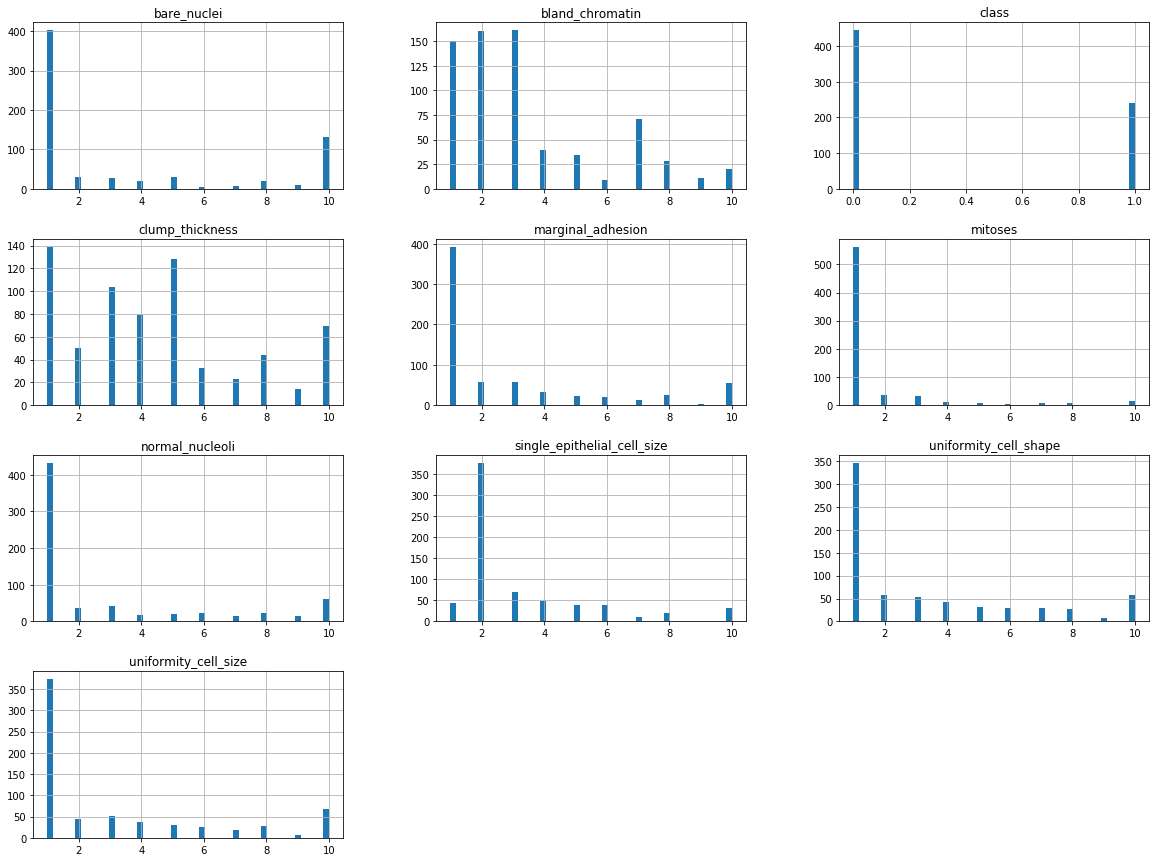

In [16]:
dataset.hist(bins=50, figsize = (20,15));  # method to draw an histogram of all features in the dataset

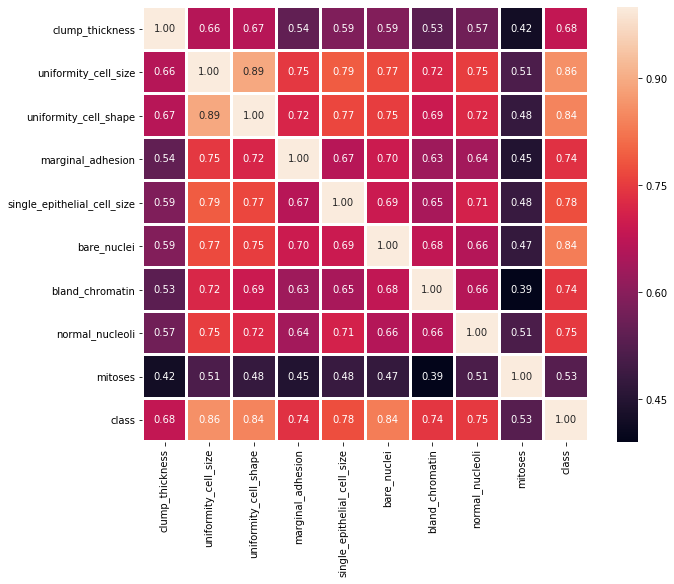

In [17]:
plt.figure(figsize= (10, 8))
sns.heatmap(dataset.corr(method ='spearman'),linecolor='white', linewidths=2, fmt= '.2f',
           annot=True,);  # seaborn function to draw a heatmap based on feature 
                                                               # correlation

## Feature Selection:
The features `uniformity_cell_size`, `uniformity_cell_shape` and `single_epithelial_cell_size` are correlated with each other. Therefore, `uniformity_cell_size` feature is alone retained.

In [18]:
dataset.drop(columns=['uniformity_cell_shape','single_epithelial_cell_size'],axis=1,inplace=True)
# dropping the columns - feature selection 

In [19]:
dataset.head()

,clump_thickness,uniformity_cell_size,marginal_adhesion,bare_nuclei,bland_chromatin,normal_nucleoli,mitoses,class
0,5,1,1,1,3,1,1,0
1,5,4,5,10,3,2,1,0
2,3,1,1,2,3,1,1,0
3,6,8,1,4,3,7,1,0
4,4,1,3,1,3,1,1,0


In [20]:
dataset.columns # the remnant columns after feature selection

Index(['clump_thickness', 'uniformity_cell_size', 'marginal_adhesion',
       'bare_nuclei', 'bland_chromatin', 'normal_nucleoli', 'mitoses',
       'class'],
      dtype='object')

A pairs plot allows us to see both distribution of single variables and relationships between two variables.

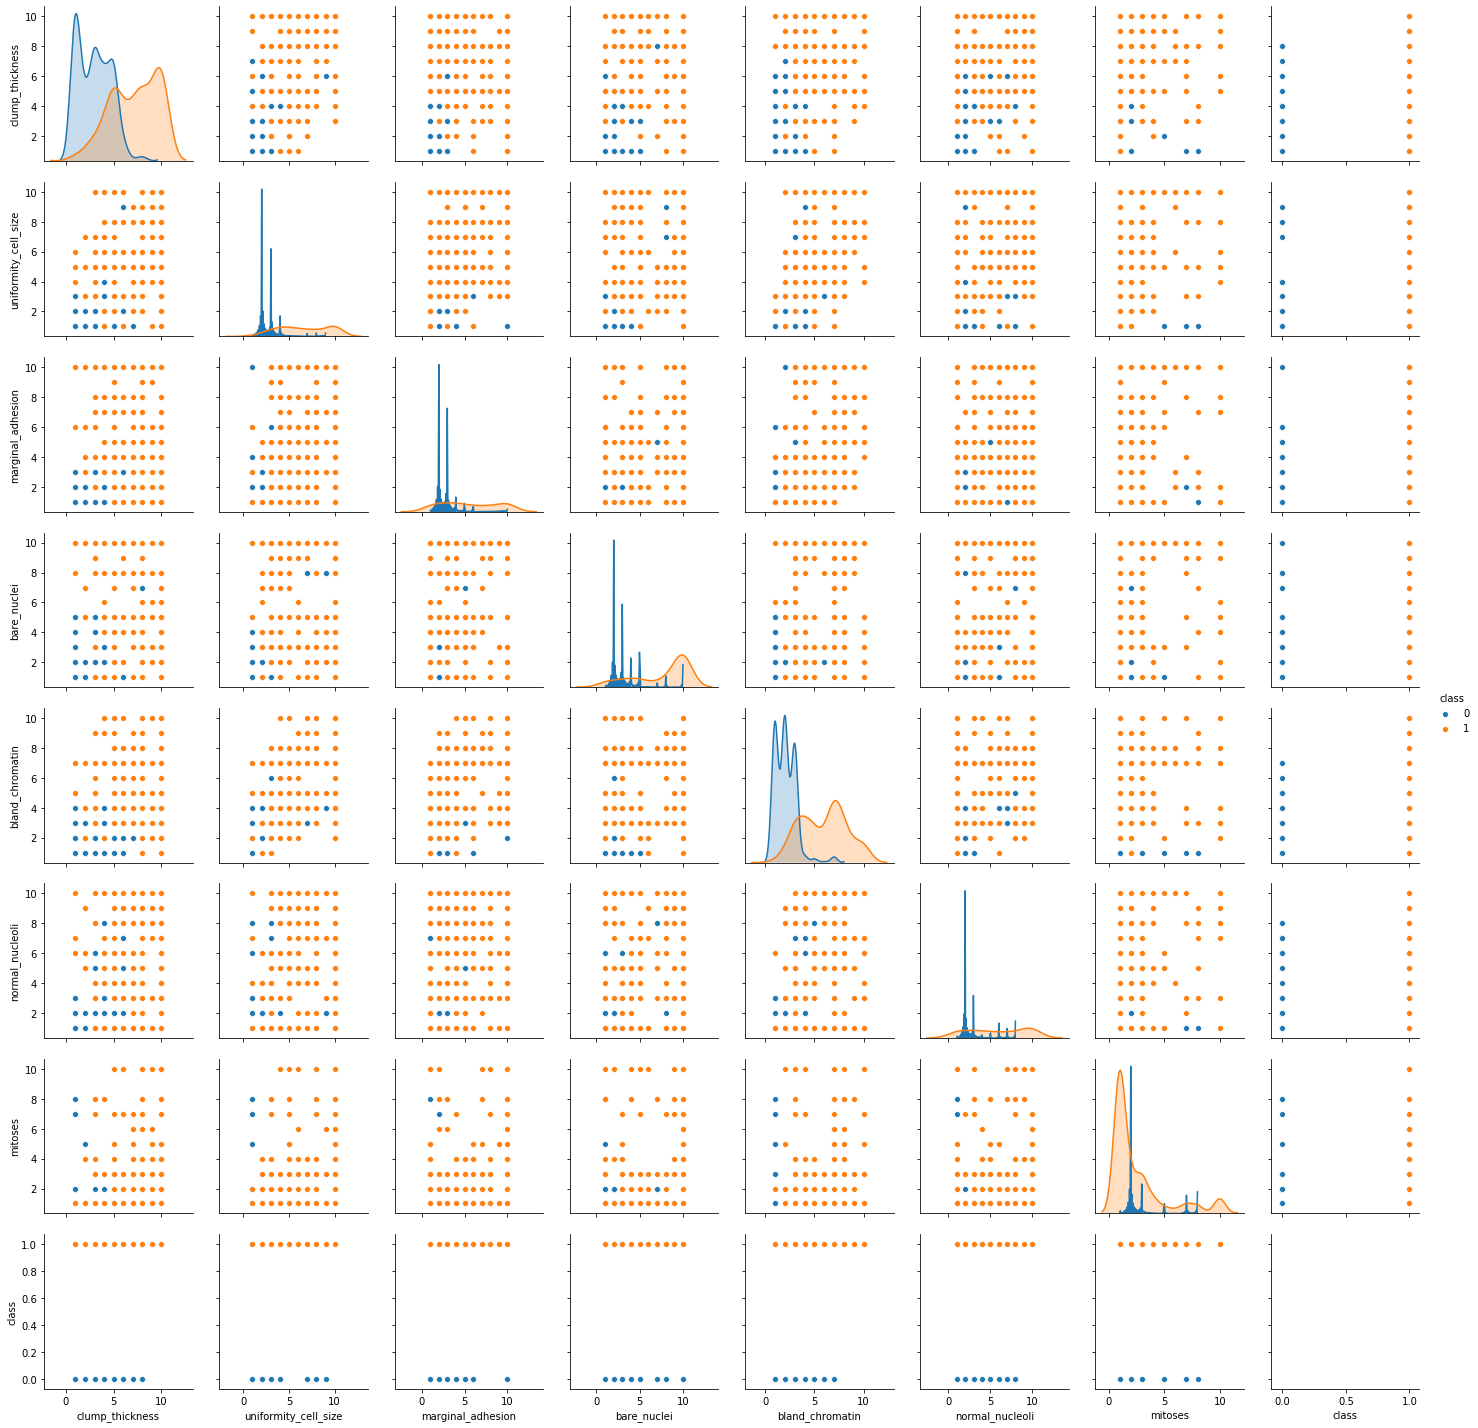

In [21]:
sns.pairplot(dataset,hue='class') # seaborn function to dislay all featues in pairplot

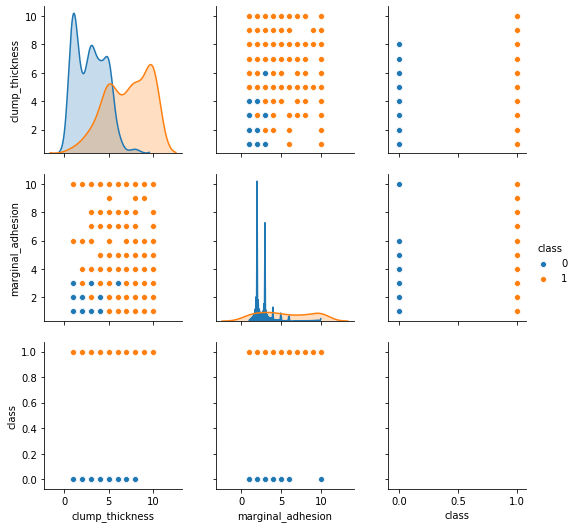

In [22]:
sns.pairplot(dataset[['clump_thickness','marginal_adhesion','class']],hue='class')  
# only selected features

##  Features and Labels - Segregation

The Machine learning part consisting of segregating the input features into dependent variables and independent variables,
training the model and testing.

In [23]:
# Create features and labels
features = dataset.drop(['class'], axis=1)     # indepenedent variable 
labels = dataset['class']                      # dependent variable 

In [24]:
# Create training and test set
features_train, features_test, labels_train, labels_test = \
train_test_split(features, labels, test_size=0.25,random_state=15)

## Scaling

### Standardization

First, Standardization step was performed.

In [25]:
x_sc= StandardScaler()
features_train_scaled = x_sc.fit_transform(features_train)
features_test_scaled = x_sc.transform(features_test)

## Performance Metric Recap

### Mathews Correlation Coefficient (MCC)

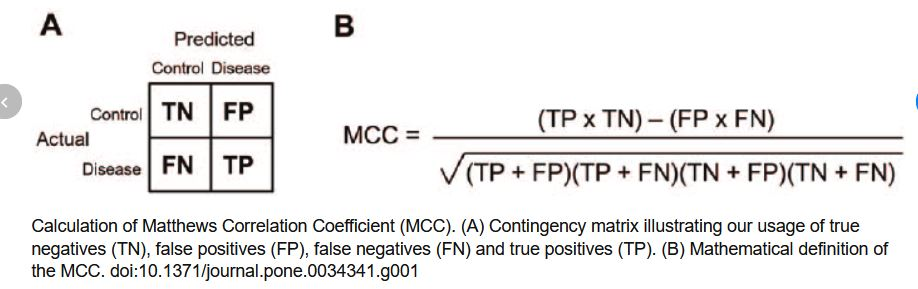

In [26]:

Image(filename='mcc.jpg')
#Source:doi:10.1371/journal.pone.0034341.g001 , accessed on 21. August 2020

### F1 score

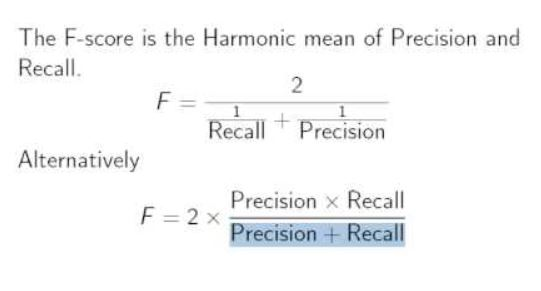

In [27]:
Image(filename='f1.jpg')
#Source:DeepAI, accessed on 21. August 2020

## kNN

In [28]:
grid_params={'n_neighbors':[i for i in range(2,21)],
            'weights':['uniform','distance'],
           'metric':['euclidean']  }

grid_knn= GridSearchCV(KNeighborsClassifier(),grid_params,verbose=1,cv=5,n_jobs=-1)
grid_knn_results=grid_knn.fit(features_train_scaled,labels_train)

Fitting 5 folds for each of 38 candidates, totalling 190 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    5.6s
[Parallel(n_jobs=-1)]: Done 190 out of 190 | elapsed:    6.0s finished


In [29]:
grid_knn_results.best_score_

0.9726442033123929

In [30]:
grid_knn_results.best_estimator_

KNeighborsClassifier(metric='euclidean', n_neighbors=3)

In [31]:
grid_knn_results.best_params_

{'metric': 'euclidean', 'n_neighbors': 3, 'weights': 'uniform'}

In [32]:
# training with the best model and prediction
from sklearn.metrics import accuracy_score
best_knn_model = grid_knn_results.best_estimator_  # best model obtained by grid search



knn_accuracy=(best_knn_model.score(features_test_scaled, labels_test)) # best model accuracy
y_pred=best_knn_model.fit(features_train_scaled,labels_train).predict(features_test_scaled)
knn_mc=matthews_corrcoef(labels_test, y_pred) # mathew correlation coefficient
knn_f1=f1_score(labels_test, y_pred)  # f1 score
knn=[knn_accuracy,knn_mc,knn_f1]  # enclosing the performance metrics in  a list


In [33]:
knn  # accuracy, mc, f1 score

[0.9415204678362573, 0.8775780424392734, 0.9253731343283583]

### kNN - feature Importances

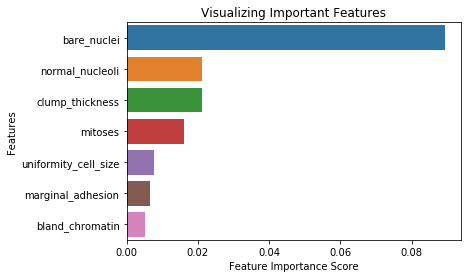

In [34]:
results = permutation_importance(best_knn_model, features_train_scaled, labels_train, scoring='accuracy',random_state=15)
# get importance
importance = results.importances_mean
feature_imp = pd.Series(importance,index=features_train.columns).sort_values(ascending=False)
 
    
sns.barplot(x=feature_imp, y=feature_imp.index)
# Add labels to your graph
plt.xlabel('Feature Importance Score')
plt.ylabel('Features')
plt.title("Visualizing Important Features")
plt.show()

It is evedient that the `bare nuclei`, `normal nuclei` and `clump_thickness` are the most prominent features.

## Logistic Regression

In [35]:
 

# Create hyperparameter options
hyperparameters = dict(C= np.logspace(0,5), penalty=[ 'l1','l2', 'elasticnet','none'],
                       solver=[ 'newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga'],
                      multi_class=['auto' , 'multinomial'])


grid_logit = GridSearchCV(LogisticRegression(), hyperparameters, verbose=1,cv=5,n_jobs=-1)

grid_logit_results=grid_logit.fit(features_train_scaled,labels_train)

Fitting 5 folds for each of 2000 candidates, totalling 10000 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done 304 tasks      | elapsed:    0.6s
[Parallel(n_jobs=-1)]: Done 2704 tasks      | elapsed:    3.0s
[Parallel(n_jobs=-1)]: Done 6704 tasks      | elapsed:    7.8s
[Parallel(n_jobs=-1)]: Done 10000 out of 10000 | elapsed:   14.6s finished


In [36]:
 grid_logit_results.best_params_

{'C': 1.0, 'multi_class': 'auto', 'penalty': 'l2', 'solver': 'newton-cg'}

In [37]:
best_logistic_model =  grid_logit_results.best_estimator_
y_pred=best_logistic_model.fit(features_train_scaled,labels_train).predict(features_test_scaled)



logit_accuracy=(grid_logit_results.score(features_test_scaled, labels_test)) # best model accuracy

logit_mc=matthews_corrcoef(labels_test, y_pred)
logit_f1=f1_score(labels_test, y_pred)
logit =[logit_accuracy,logit_mc, logit_f1]
logit

[0.9707602339181286, 0.9391420202236939, 0.962406015037594]

### Logistic Regression - Feature Importances

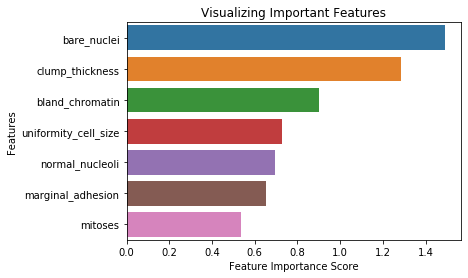

In [38]:
feature_imp = pd.Series(best_logistic_model.coef_[0],index=features_train.columns).sort_values(ascending=False)
 # Creating a bar plot
sns.barplot(x=feature_imp, y=feature_imp.index)
# Add labels to your graph
plt.xlabel('Feature Importance Score')
plt.ylabel('Features')
plt.title("Visualizing Important Features")
plt.show()

It is evident that `bare nuclei`, `clump thickness` and `bland chromatin` are the most prominent features.

## SVC

In [39]:
from sklearn.svm import SVC

hyperparameters = dict(C= [0.01,0.001,1,2,3,4,5,10], kernel=["linear"],#,"rbf","poly","sigmoid"],
                        )


grid_svc = GridSearchCV(SVC(), hyperparameters, verbose=1,cv=5,n_jobs=-1)

grid_svc_results=grid_svc.fit(features_train_scaled,labels_train)

Fitting 5 folds for each of 8 candidates, totalling 40 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  40 out of  40 | elapsed:    0.1s finished


In [40]:
grid_svc_results.best_params_

{'C': 2, 'kernel': 'linear'}

In [41]:
best_svc_model = grid_svc_results.best_estimator_  # best model obtained by 
y_pred=best_svc_model.fit(features_train_scaled,labels_train).predict(features_test_scaled)
svm_mc=matthews_corrcoef(labels_test, y_pred)
svm_f1=f1_score(labels_test, y_pred)
svm_accuracy=(grid_svc_results.score(features_test_scaled, labels_test))
svm=[svm_accuracy,svm_mc,svm_f1]
svm

[0.9649122807017544, 0.9267561393489434, 0.9558823529411765]

###  SVC - Feature Importances

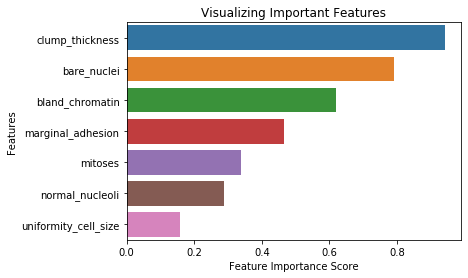

In [42]:
 
feature_imp = pd.Series(best_svc_model.coef_[0],index=features_train.columns).sort_values(ascending=False)
# Creating a bar plot
sns.barplot (x=feature_imp, y=feature_imp.index)
# Add labels to your graph
plt.xlabel('Feature Importance Score')
plt.ylabel('Features')
plt.title("Visualizing Important Features")
plt.show()

It is evident that `clump thickness` , `bare nuclei` , `bland chromatin` are the most prominent features.

## Random forests

In [43]:

from sklearn.ensemble import RandomForestClassifier
param_grid = { 
    'n_estimators': [i for i in range(10,100,5)],
    'max_features': ['auto' , 'sqrt', 'log2'],
    'max_depth' : [2,3,4,5,6,7],
    'criterion' :['gini','entropy']
}

In [44]:
grid_rf = GridSearchCV(RandomForestClassifier(), param_grid=param_grid, cv= 5,verbose=1 ,n_jobs=-1)
grid_rf_results=grid_rf.fit(features_train_scaled,labels_train)

grid_rf_results.best_estimator_

Fitting 5 folds for each of 648 candidates, totalling 3240 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  52 tasks      | elapsed:    1.1s
[Parallel(n_jobs=-1)]: Done 352 tasks      | elapsed:    8.9s
[Parallel(n_jobs=-1)]: Done 852 tasks      | elapsed:   21.0s
[Parallel(n_jobs=-1)]: Done 1552 tasks      | elapsed:   39.4s
[Parallel(n_jobs=-1)]: Done 2452 tasks      | elapsed:  1.1min
[Parallel(n_jobs=-1)]: Done 3240 out of 3240 | elapsed:  1.4min finished


RandomForestClassifier(criterion='entropy', max_depth=3, max_features='log2',
                       n_estimators=70)

In [45]:
grid_rf_results.best_params_

{'criterion': 'entropy',
 'max_depth': 3,
 'max_features': 'log2',
 'n_estimators': 70}

In [46]:
best_rf_model = grid_rf_results.best_estimator_ 
y_pred=best_rf_model.fit(features_train_scaled,labels_train).predict(features_test_scaled)


rf_f1=f1_score(labels_test, y_pred)
rf_mc=matthews_corrcoef(labels_test, y_pred)
rf_accuracy=(grid_rf_results.score(features_test_scaled, labels_test))
rf=[rf_accuracy,rf_mc,rf_f1]
rf

[0.9707602339181286, 0.9391852057407679, 0.9635036496350365]

### Random Forest - Feature Importances

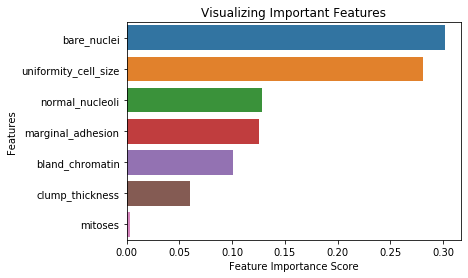

In [47]:
feature_imp = pd.Series(best_rf_model.feature_importances_,index=dataset.columns[:-1]).sort_values(ascending=False)

# Creating a bar plot
sns.barplot(x=feature_imp, y=feature_imp.index)
# Add labels to your graph
plt.xlabel('Feature Importance Score')
plt.ylabel('Features')
plt.title("Visualizing Important Features")
plt.show()

It is evident that `uniformity cell size` , `bare nuclei` , `bland chromatin` are the most prominent features.

## Handling Imbalanced datasets

In [48]:
dataset['class'].value_counts() 

0    444
1    239
Name: class, dtype: int64

In [49]:
features_train_scaled=pd.DataFrame(features_train_scaled,columns=features.columns)
features_train_scaled['class']=labels_train
features_test_scaled=pd.DataFrame(features_test_scaled,columns=features.columns)
#labels_test.reset_index(drop=True)
features_test_scaled['class']=labels_test.reset_index(drop=True)


In [50]:
features_train_scaled.shape , features_test_scaled.shape

((512, 8), (171, 8))

In [51]:
scaled=pd.concat([features_train_scaled,features_test_scaled])

In [52]:
scaled.shape

(683, 8)

In [53]:
# Upsample minority class
df_majority = scaled[scaled['class']==0]
df_minority = scaled[scaled['class']==1]

df_minority_upsampled = resample(df_minority, 
                                 replace=True,     # sample with replacement
                                 n_samples=444,    # to match majority class
                                 random_state=123) # reproducible results
 
# Combine majority class with upsampled minority class
df_upsampled = pd.concat([df_majority, df_minority_upsampled])
  

In [54]:
# Create features and labels
features_up = df_upsampled.drop(['class'], axis=1)     # indepenedent variable 
labels_up = df_upsampled['class']                      # dependent variable 


features_train, features_test, labels_train, labels_test = \
train_test_split(features_up, labels_up, test_size=0.25,random_state=15)

# kNN model

clf_1 = KNeighborsClassifier().fit(features_train, labels_train)
pred_y_1 = clf_1.predict(features_test)
print( np.unique( pred_y_1 ) )
print( accuracy_score(labels_test, pred_y_1) )

[0. 1.]
0.6243654822335025


In [55]:
# Downsample a majority class
df_majority = scaled[scaled['class']==0]
df_minority = scaled[scaled['class']==1]
# Down-sample majority class

df_majority_downsampled = resample(df_majority,
                             replace=False, # sample without replacement
                               n_samples=239, # to match minority class
                              random_state=123)
 
# Combine majority class with upsampled minority class
df_downsampled = pd.concat([df_majority_downsampled,
df_minority]) 
 

In [56]:
# Create features and labels
features_down = df_downsampled.drop(['class'], axis=1)     # indepenedent variable 
labels_down = df_downsampled['class']                      # dependent variable 

features_train, features_test, labels_train, labels_test = \
train_test_split(features_down, labels_down, test_size=0.25,random_state=15)


clf_2 = KNeighborsClassifier().fit(features_train, labels_train)
pred_y_2 = clf_2.predict(features_test)
print( np.unique( pred_y_2 ) )
print( accuracy_score(labels_test, pred_y_2) )

[0. 1.]
0.5826086956521739


The accuracy of the kNN model becomes so low may be an impact based on the `scaled`,`feature selected` and `balanced dataset`. Therefore, I decided not to consider balancing the dataset and experimenting different algorithms on it.

## Discussion about Features Importance Ranking

Top 3 features obtained are:
1. The `kNN classifier` feature importance ranking suggest that `bare nuceli, normal nuceoli, clump thickness`
2. The `Logistic Regression` feature importance ranking suggest that `bare nuceli, clump thickness, band chromatin`
3. The `SVM classifier` feature importance ranking suggest that `clump thickess, bare nuceli, band chromatin`
4. The `Random Forest Classifier` feature importance ranking suggest that `unformity cell size, bare nuceli, normal nuceoli`.

All the 3 models predicted `bare nuceli` to be the most prominent feature.
The scientific literature `Significance of nuclear morphometry in benign and malignant breast aspirates in the Int J Appl Basic Med Res.` suggests that cytological features of the cells an important criteria to differentiate malignant from benign. `Nuclear size, shape, chromatin pattern, and nucleoli size` have all been reported to change in breast cancer as cited in that article and also predicted as important features by the machine learning models.

This dataset is a `feature selected` dataset with reduced features, perhaps its influence could have been observed in the feature ranking also, especially with the Random forest model.



## Summary - Finding Best Model

In [57]:
algo= [knn, svm,logit,rf]
algo

[[0.9415204678362573, 0.8775780424392734, 0.9253731343283583],
 [0.9649122807017544, 0.9267561393489434, 0.9558823529411765],
 [0.9707602339181286, 0.9391420202236939, 0.962406015037594],
 [0.9707602339181286, 0.9391852057407679, 0.9635036496350365]]

In [58]:
pd.DataFrame(algo, columns=['Accuracy','MCC','F1'],index=['kNN','SVM','Logistic Regression','Random Forests'])

,Accuracy,MCC,F1
kNN,0.941520,0.877578,0.925373
SVM,0.964912,0.926756,0.955882
Logistic Regression,0.970760,0.939142,0.962406
Random Forests,0.970760,0.939185,0.963504


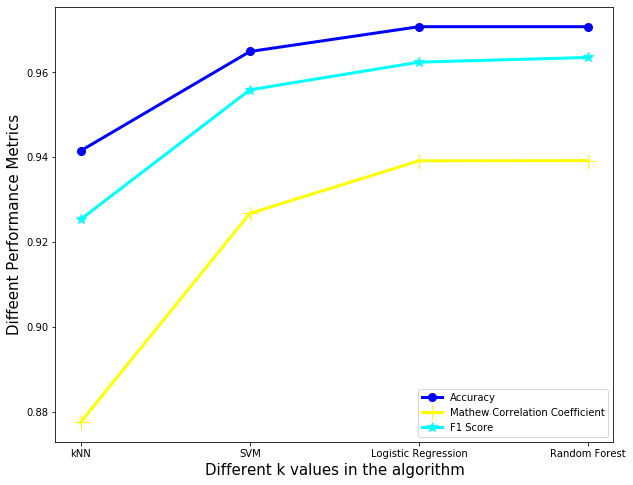

In [59]:
algo_list=['kNN','SVM','Logistic Regression','Random Forest']
plt.figure(figsize= (10, 8))
plt.plot(algo_list,[ele[0] for ele in algo],"bo-",color='blue',\
             linewidth=3,markersize=8,label='Accuracy')

plt.plot(algo_list,[ele[1] for ele in algo],"+-",color='yellow',\
             linewidth=3,markersize=15,label='Mathew Correlation Coefficient')

plt.plot(algo_list,[ele[2] for ele in algo],"*-",color='cyan',\
             linewidth=3,markersize=10,label='F1 Score')

plt.legend()
plt.xlabel('Different k values in the algorithm',fontsize=15)

plt.ylabel("Diffeent Performance Metrics",fontsize=15);

  

## Inference:
On infering from this plot between different algorithms vs their peformance metrics, it can be seen that the performance metrics gradually increases from kNN to the Random forest.
Both Logistic Regression and Random forest perform similar, but the best algorithm can be considered as `Random Forest`.

## Conclusion:
       The Random Forest is the best machine learning algorithm for this modified (feature selected) dataset.

In [ ]:
# My reference:

In [60]:
"""third method - fitting the best model
classifier = KNeighborsClassifier(metric='euclidean', n_neighbors= 13, weights= 'uniform')
classifier.fit(features_train_scaled, labels_train)
pred = classifier.predict(features_test_scaled)
accuracy = accuracy_score(labels_test, pred)  # accuracy
print('Accuracy: {}'.format(accuracy))
precision = precision_score(labels_test, pred) # precision
print ('Precision: {}'.format(precision))
recall = recall_score(labels_test, pred )  # recall
print ('Recall: {}'.format(recall))
auroc = roc_auc_score(labels_test, pred)   # area under curve
print ('AUROC score: {}'.format(auroc))

##print(gs_results.score(features_test_scaled, labels_test)) -- best model accuracy

best_rf_model = grid_rf_results.best_estimator_  # best model obtained by 
y_pred=best_rf_model.fit(features_train_scaled,labels_train).predict(features_test_scaled)
model_accuracy=accuracy_score(labels_test, y_pred)
print("The model's accuracy is {}.".format(model_accuracy))
"""

'third method - fitting the best model\nclassifier = KNeighborsClassifier(metric=\'euclidean\', n_neighbors= 13, weights= \'uniform\')\nclassifier.fit(features_train_scaled, labels_train)\npred = classifier.predict(features_test_scaled)\naccuracy = accuracy_score(labels_test, pred)  # accuracy\nprint(\'Accuracy: {}\'.format(accuracy))\nprecision = precision_score(labels_test, pred) # precision\nprint (\'Precision: {}\'.format(precision))\nrecall = recall_score(labels_test, pred )  # recall\nprint (\'Recall: {}\'.format(recall))\nauroc = roc_auc_score(labels_test, pred)   # area under curve\nprint (\'AUROC score: {}\'.format(auroc))\n\n##print(gs_results.score(features_test_scaled, labels_test)) -- best model accuracy\n\nbest_rf_model = grid_rf_results.best_estimator_  # best model obtained by \ny_pred=best_rf_model.fit(features_train_scaled,labels_train).predict(features_test_scaled)\nmodel_accuracy=accuracy_score(labels_test, y_pred)\nprint("The model\'s accuracy is {}.".format(model_